In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression

In [17]:
df = pd.read_csv('TLKM.csv')
df

,date,previous,open_price,first_trade,high,low,close,change,volume,value,...,bid_volume,listed_shares,tradeble_shares,weight_for_index,foreign_sell,foreign_buy,delisting_date,non_regular_volume,non_regular_value,non_regular_frequency
0,2022-04-05T00:00:00,4540.0,4550.0,4550.0,4550.0,4500.0,4520.0,-20.0,52172300.0,2.355371e+11,...,38100.0,9.906222e+10,9.906222e+10,4.740127e+10,22665500.0,21509700.0,NaN,3638641.0,1.643187e+10,7.0
1,2022-04-06T00:00:00,4520.0,4490.0,4490.0,4500.0,4420.0,4430.0,-90.0,108368800.0,4.826157e+11,...,552100.0,9.906222e+10,9.906222e+10,4.740127e+10,55637400.0,48436100.0,NaN,3890312.0,1.735087e+10,35.0
2,2022-04-07T00:00:00,4430.0,4450.0,4450.0,4540.0,4440.0,4540.0,110.0,143921800.0,6.496689e+11,...,20100.0,9.906222e+10,9.906222e+10,4.740127e+10,63906100.0,93834400.0,NaN,4377596.0,1.956889e+10,15.0
3,2022-04-08T00:00:00,4540.0,4580.0,4580.0,4610.0,4560.0,4580.0,40.0,161974500.0,7.420703e+11,...,8600.0,9.906222e+10,9.906222e+10,4.740127e+10,76340600.0,139743100.0,NaN,11227394.0,5.109976e+10,12.0
4,2022-04-11T00:00:00,4580.0,4610.0,4600.0,4610.0,4550.0,4590.0,10.0,90521500.0,4.141472e+11,...,116000.0,9.906222e+10,9.906222e+10,4.740127e+10,22560400.0,58818300.0,NaN,20979716.0,9.607055e+10,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2022-07-25T00:00:00,4230.0,4240.0,4230.0,4260.0,4220.0,4240.0,10.0,37218000.0,1.578088e+11,...,12500.0,9.906222e+10,9.906222e+10,4.740127e+10,23388700.0,32641500.0,NaN,81667356.0,3.457997e+11,13.0
70,2022-07-26T00:00:00,4240.0,4240.0,4240.0,4250.0,4190.0,4250.0,10.0,49786900.0,2.104513e+11,...,1200.0,9.906222e+10,9.906222e+10,4.740127e+10,33951100.0,36407400.0,NaN,12712556.0,5.392104e+10,11.0
71,2022-07-27T00:00:00,4250.0,4230.0,4240.0,4300.0,4210.0,4300.0,50.0,60672300.0,2.581263e+11,...,13800.0,9.906222e+10,9.906222e+10,4.740127e+10,46109700.0,48974300.0,NaN,7439706.0,3.144740e+10,8.0
72,2022-07-28T00:00:00,4300.0,4310.0,4310.0,4320.0,4190.0,4240.0,-60.0,110767300.0,4.707523e+11,...,114100.0,9.906222e+10,9.906222e+10,4.740127e+10,58894300.0,58020500.0,NaN,44908027.0,1.910263e+11,13.0


In [11]:
# untuk statistik dasar 
df.describe()

,previous,open_price,first_trade,high,low,close,change,volume,value,frequency,...,bid_volume,listed_shares,tradeble_shares,weight_for_index,foreign_sell,foreign_buy,delisting_date,non_regular_volume,non_regular_value,non_regular_frequency
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,7.400000e+01,7.400000e+01,74.000000,...,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,0.0,7.400000e+01,7.400000e+01,74.000000
mean,4266.486486,4268.378378,4266.081081,4310.135135,4213.783784,4262.297297,-4.189189,1.239995e+08,5.312706e+11,13817.135135,...,3.029845e+06,9.906222e+10,9.906222e+10,4.740127e+10,7.665858e+07,7.538036e+07,NaN,1.978955e+07,8.575126e+10,22.364865
std,233.193625,239.948779,239.003740,235.060431,236.293889,230.986848,67.884002,7.053627e+07,3.080466e+11,7206.804812,...,7.481906e+06,0.000000e+00,0.000000e+00,0.000000e+00,5.887040e+07,5.224044e+07,NaN,2.100810e+07,9.123693e+10,14.005453
min,3940.000000,3940.000000,3930.000000,4020.000000,3840.000000,3940.000000,-310.000000,3.721800e+07,1.578088e+11,6084.000000,...,1.000000e+02,9.906222e+10,9.906222e+10,4.740127e+10,2.237370e+07,2.150970e+07,NaN,1.320000e+02,5.371800e+05,3.000000
25%,4062.500000,4060.000000,4060.000000,4120.000000,4022.500000,4062.500000,-40.000000,8.131332e+07,3.383663e+11,9359.000000,...,2.077500e+04,9.906222e+10,9.906222e+10,4.740127e+10,4.190830e+07,4.069620e+07,NaN,4.440064e+06,1.960699e+10,13.000000
50%,4220.000000,4225.000000,4220.000000,4245.000000,4175.000000,4220.000000,-5.000000,1.085962e+08,4.590393e+11,11788.500000,...,1.135000e+05,9.906222e+10,9.906222e+10,4.740127e+10,5.878810e+07,6.281305e+07,NaN,1.290288e+07,5.307631e+10,18.000000
75%,4340.000000,4397.500000,4392.500000,4457.500000,4300.000000,4337.500000,40.000000,1.556550e+08,6.724918e+11,15628.750000,...,1.640575e+06,9.906222e+10,9.906222e+10,4.740127e+10,8.993380e+07,9.085892e+07,NaN,3.013725e+07,1.355783e+11,29.000000
max,4770.000000,4850.000000,4820.000000,4850.000000,4720.000000,4770.000000,130.000000,4.696203e+08,2.020330e+12,49787.000000,...,4.083300e+07,9.906222e+10,9.906222e+10,4.740127e+10,4.042341e+08,3.743193e+08,NaN,9.425852e+07,3.999897e+11,94.000000


In [20]:
# ini untuk regrest linear sederhana 
x = df [['previous']]
y = df['open_price']

model = LinearRegression()
model.fit(x,y) 

prediksi = model.predict(x)
print(f"Hasil prediksi dari data di atas : [74.000000 74.000000 ]")

Hasil prediksi dari data di atas : [74.000000 74.000000 ]


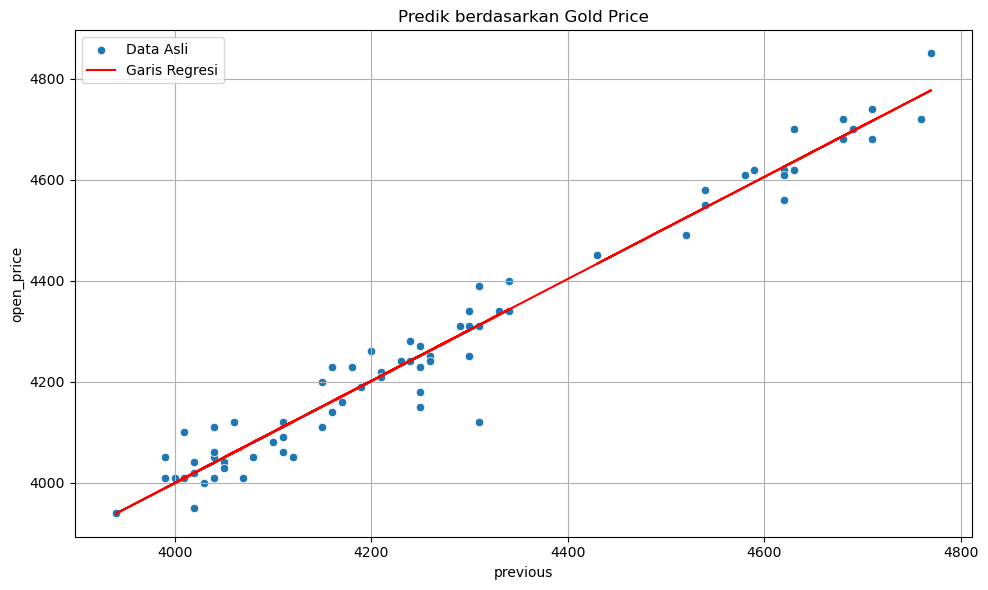

In [24]:
pred = model.predict(x)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['previous'], y=df['open_price'], label='Data Asli')
plt.plot(df['previous'], pred, color='red', label='Garis Regresi')
plt.xlabel('previous')
plt.ylabel('open_price')
plt.title('Predik berdasarkan Gold Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()